In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir('..')
os.getcwd()

'/home/yermaand/audio-nn'

In [4]:
from glob import glob
import os
import shutil
import subprocess
from src import *
import matplotlib.pyplot as plt
from scipy import signal

In [5]:
def plot_alignment(signals, ax=plt, sr=44100, each=100, length=60*2):
    k = int(sr * length)
    if ax == plt:
        ax.figure(figsize=(20, 10))
    for signal in signals:
        ax.plot(signal[:k:each], alpha=0.5)

In [6]:
def align_signals(reference, target, sr=44100):
    corr = signal.correlate(reference, target)
    lags = signal.correlation_lags(len(reference), len(target))
    lag = lags[corr.argmax()]
    print(f'lag {lag / sr:.2f} [s]')
    
    if lag > 0:
        return torch.cat([torch.zeros(lag), target[:-lag]])
    else:
        lag = abs(lag)
        return torch.cat([target[lag:], torch.zeros(lag)])

# Part I

In [7]:
alignmnemt_dict = {
    '01_Vypadova_A41': ['01_Vypadova_A6000', '01_Vypadova_D600', '01_Vypadova_RX100'],
    '03_KPrehradam_A6000': ['03_KPrehradam_A41', '03_KPrehradam_D600', '03_KPrehradam_Mobius', '03_KPrehradam_iPhoneXS'],
    '05_RX100': ['05_Mobius', '05_iphone'],
    '06_RX100': ['06_Mobius'],
    '07_RX100': ['07_iphone'],
    '08_iphone': ['08_Mobius', '08_RX100'],
    '09_RX100': ['09_Mobius', '09_iphone'],
    '10_RX100': ['10_iphone'],
    '11_RX100': ['11_Mobius', '11_iphone'],
    '12_RX100': ['12_Mobius', '12_iphone'],
    '13_RX100': ['13_Mobius', '13_iphone'],
    '14_RX100': ['14_Mobius', '14_iphone'],
    '15_RX100': ['15_Mobius', '15_iphone'],
    '16_RX100': ['16_Mobius', '16_iphone'],
    '17_RX100': ['17_Mobius', '17_iphone']
}

files = sorted(glob('data/audio/*'))
for k, v in alignmnemt_dict.items():
    for file_path in files:
        file_name = file_path.split('/')[-1].split('.')[0]
        if file_name[:2] == k[:2] and file_name != k and file_name not in alignmnemt_dict[k]:
            alignmnemt_dict[k].append(file_name)
    print(k, v)

01_Vypadova_A41 ['01_Vypadova_A6000', '01_Vypadova_D600', '01_Vypadova_RX100']
03_KPrehradam_A6000 ['03_KPrehradam_A41', '03_KPrehradam_D600', '03_KPrehradam_Mobius', '03_KPrehradam_iPhoneXS']
05_RX100 ['05_Mobius', '05_iphone']
06_RX100 ['06_Mobius']
07_RX100 ['07_iphone']
08_iphone ['08_Mobius', '08_RX100']
09_RX100 ['09_Mobius', '09_iphone']
10_RX100 ['10_iphone']
11_RX100 ['11_Mobius', '11_iphone']
12_RX100 ['12_Mobius', '12_iphone']
13_RX100 ['13_Mobius', '13_iphone']
14_RX100 ['14_Mobius', '14_iphone']
15_RX100 ['15_Mobius', '15_iphone']
16_RX100 ['16_Mobius', '16_iphone']
17_RX100 ['17_Mobius', '17_iphone']


### Example

lag 1.83 [s]
lag 0.69 [s]


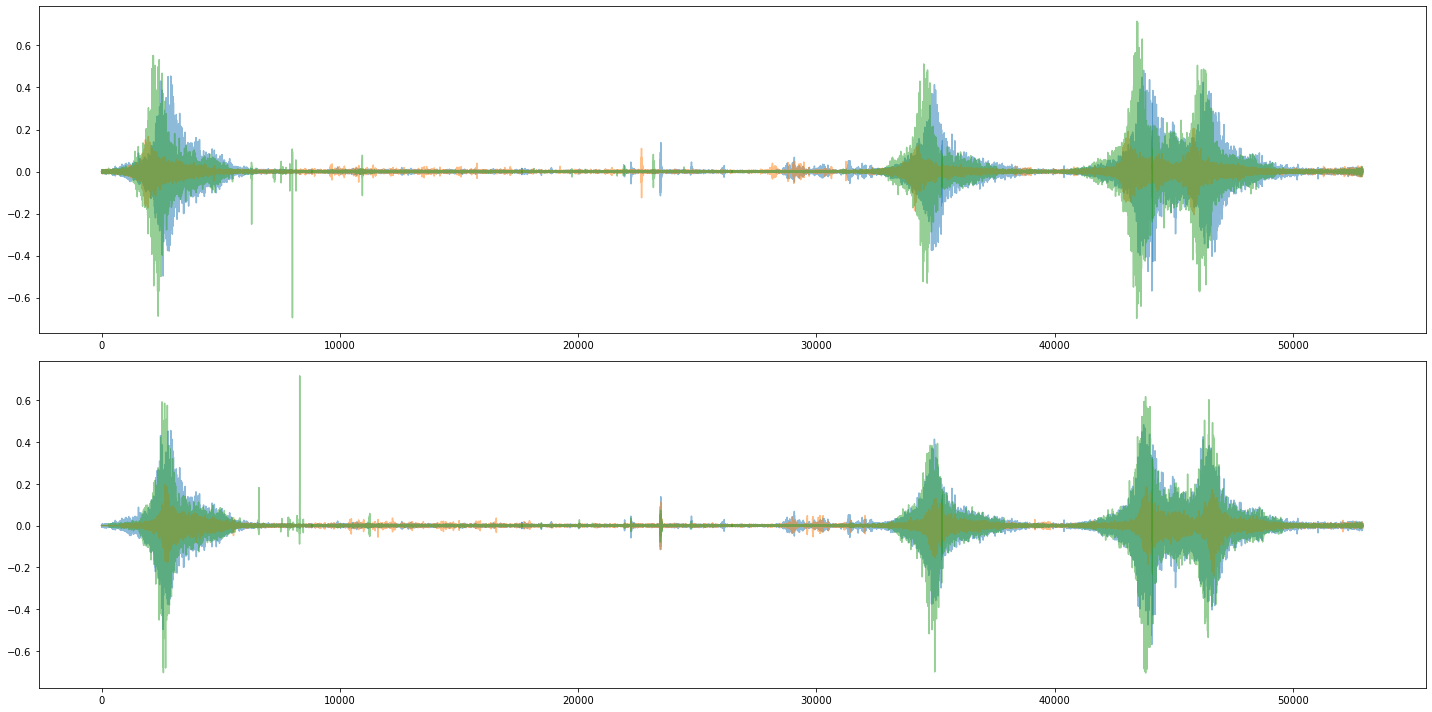

In [82]:
# example
# load wav files
signal_1, sr = load_audio_wav('data/audio/12_RX100.MP4.wav', True)
signal_2 = load_audio_wav('data/audio/12_iphone.MP4.wav')
signal_3 = load_audio_wav('data/audio/12_Mobius.MP4.wav')

# align 
signal_2_aligned = align_signals(signal_1, signal_2)
signal_3_aligned = align_signals(signal_1, signal_3)

# show
fig, axes = plt.subplots(2, figsize=(20, 10))
plot_alignment([signal_1, signal_2, signal_3], ax=axes[0])
plot_alignment([signal_1, signal_2_aligned, signal_3_aligned], ax=axes[1])
plt.tight_layout()

# save
# torch.save([signal_1, sr], 'data/audio_tensors/12_RX100.MP4.pt')
# torch.save([signal_2_aligned, sr], 'data/audio_tensors/12_iphone.MP4.pt')
# torch.save([signal_3_aligned, sr], 'data/audio_tensors/12_Mobius.MP4.pt')

### Cycle

In [57]:
# lag 4.87 [s]
# lag 0.66 [s]

lag -0.24 [s]
lag -0.79 [s]
lag 0.59 [s]
lag -5.62 [s]
lag -3.35 [s]
lag -3.87 [s]
lag -1.65 [s]
lag 0.19 [s]
lag -1.99 [s]
lag 0.47 [s]
lag 3.93 [s]
lag 1.81 [s]
lag 1.43 [s]
lag -0.09 [s]
lag -2.02 [s]
lag 0.43 [s]
lag -0.31 [s]
lag 1.93 [s]
lag 0.69 [s]
lag 1.83 [s]
lag 0.70 [s]
lag -1.29 [s]
lag -1.25 [s]
lag 1.00 [s]
lag 0.18 [s]
lag 1.18 [s]
lag -0.46 [s]
lag -0.74 [s]
lag 4.87 [s]
lag 0.66 [s]


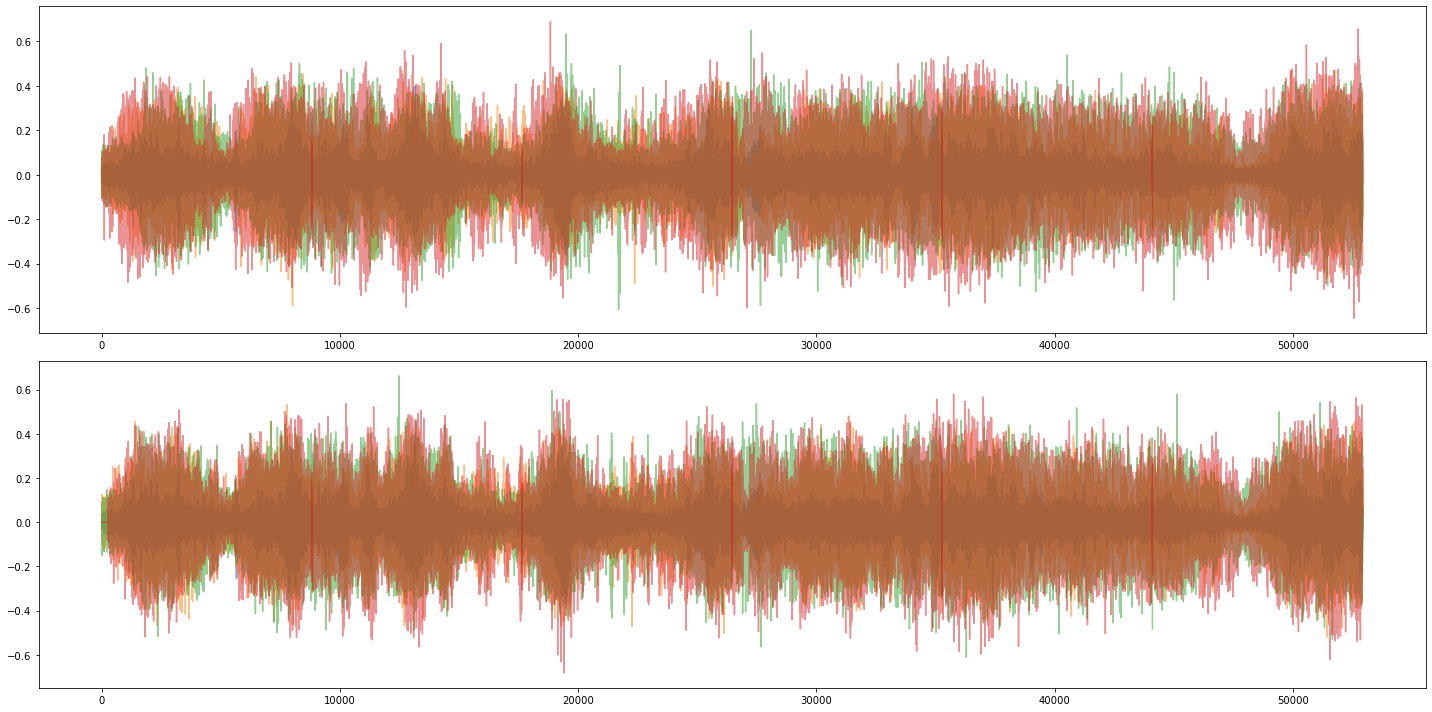

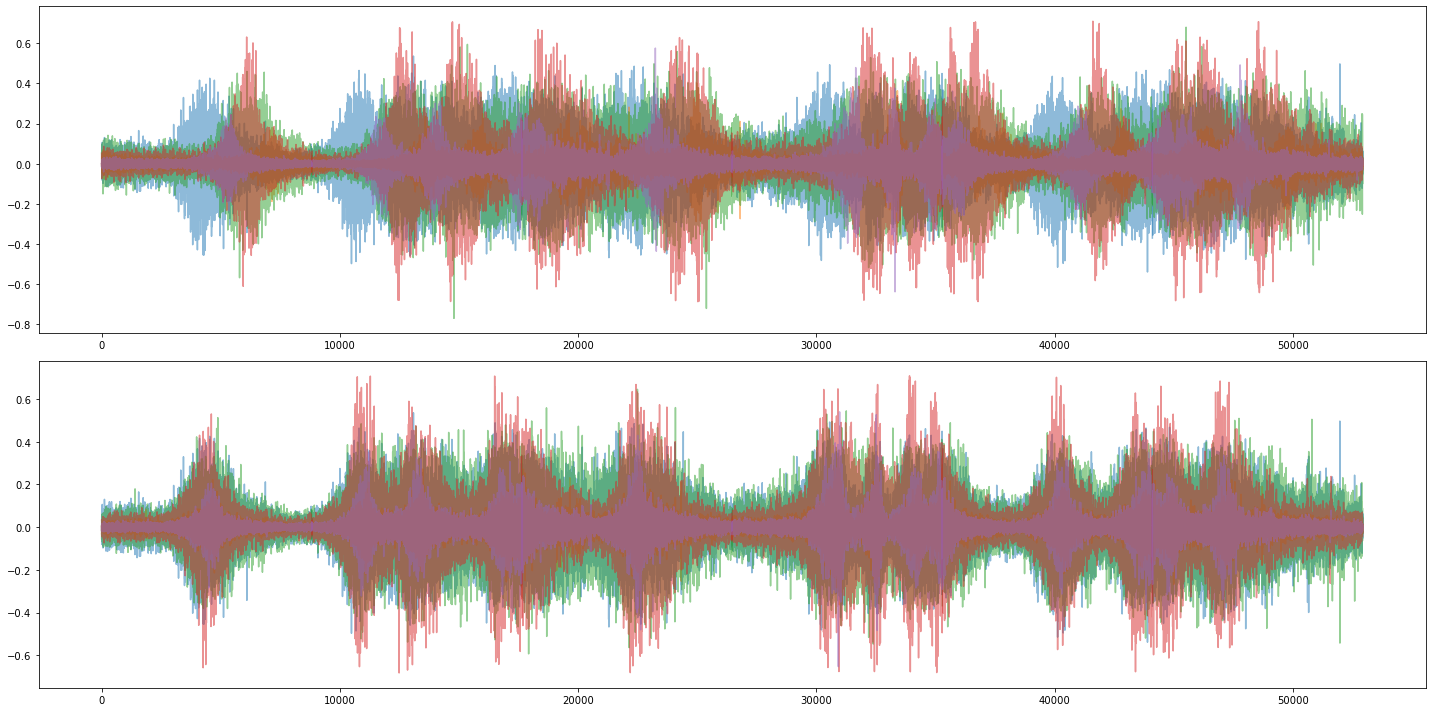

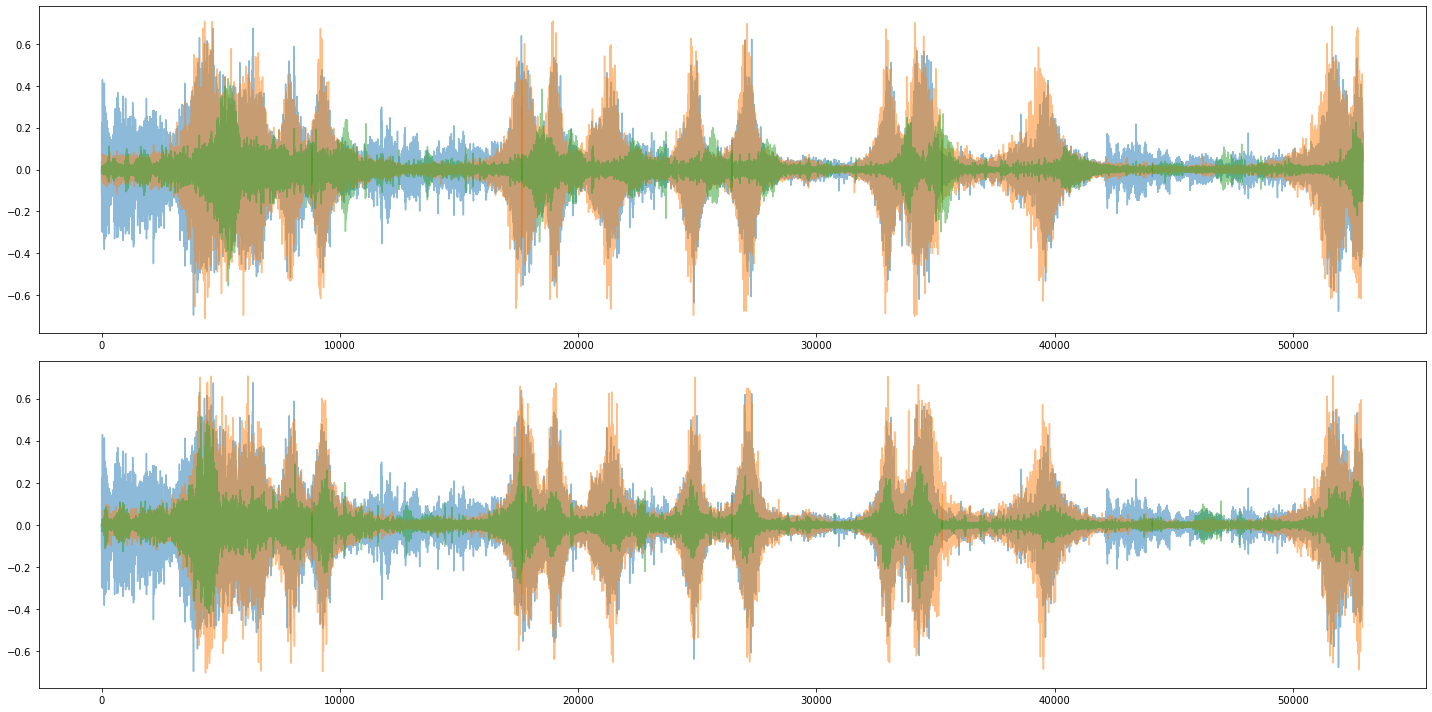

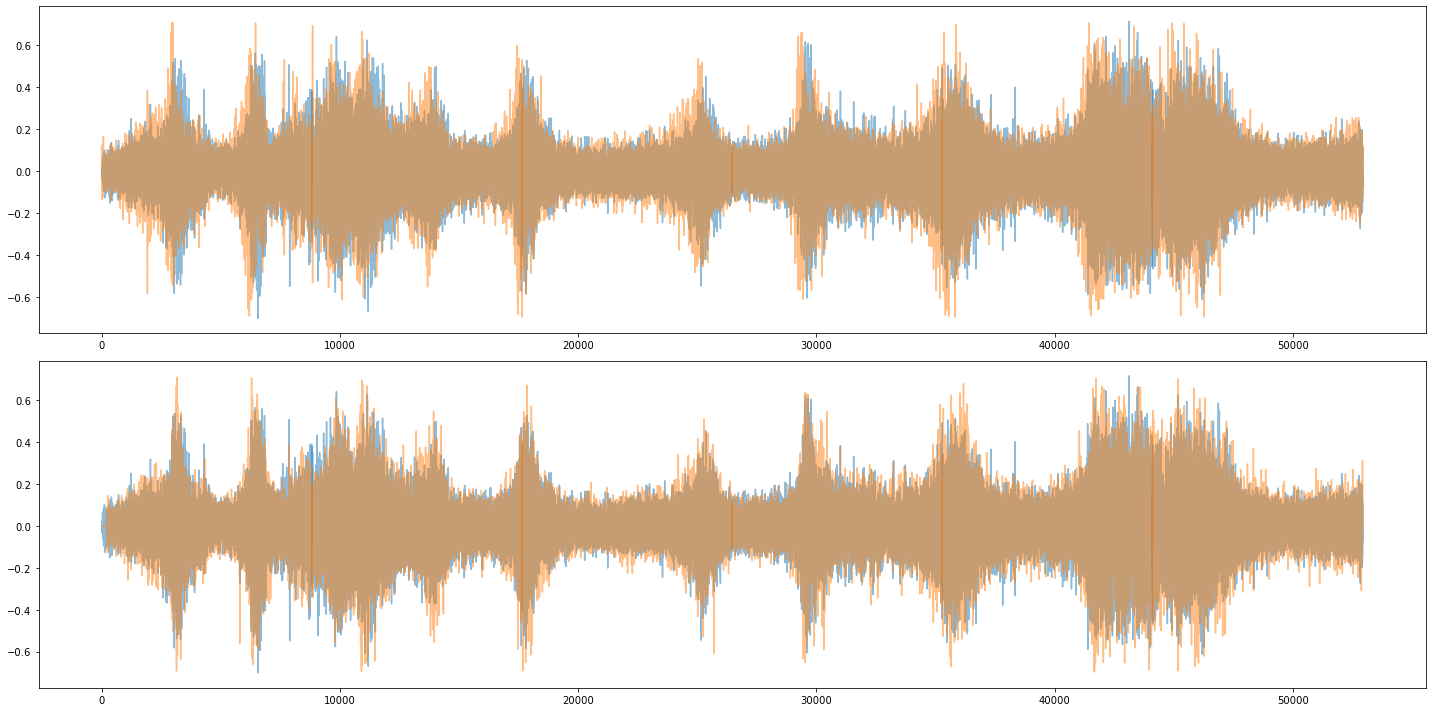

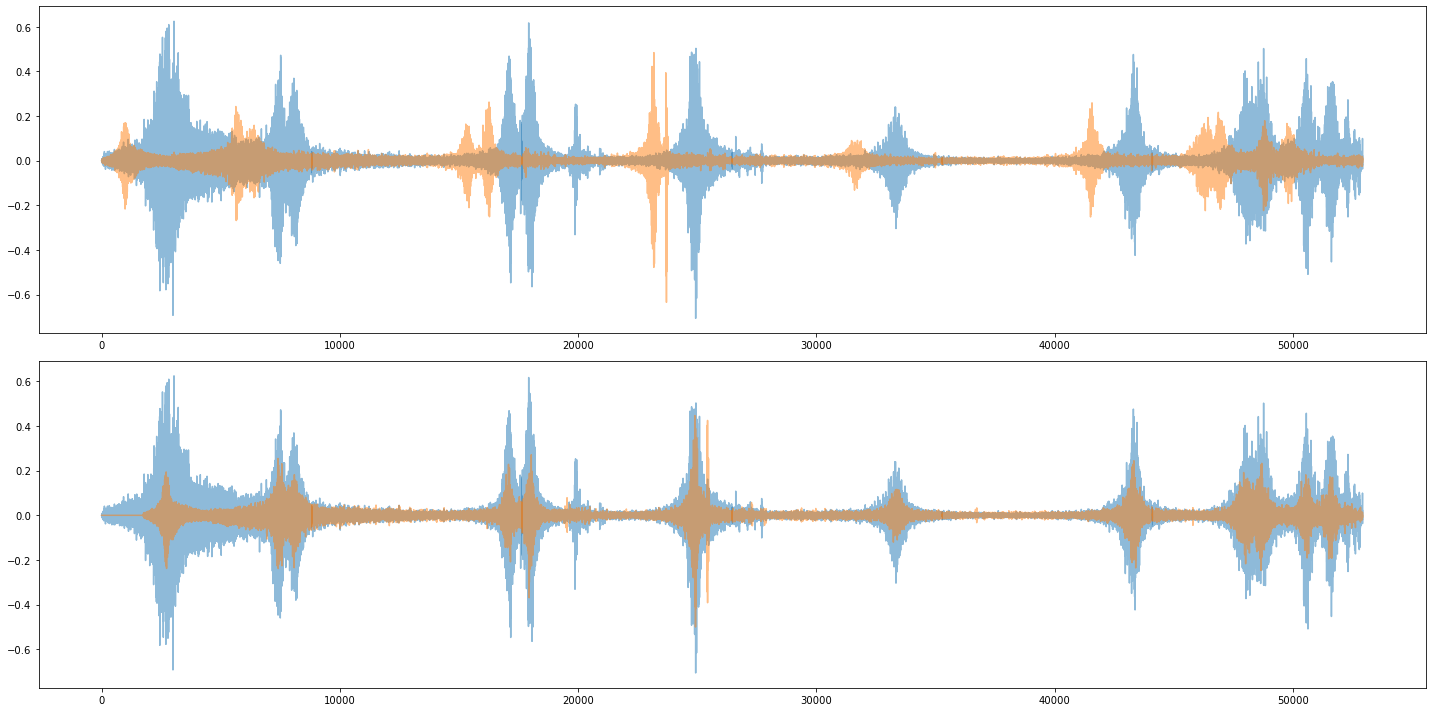

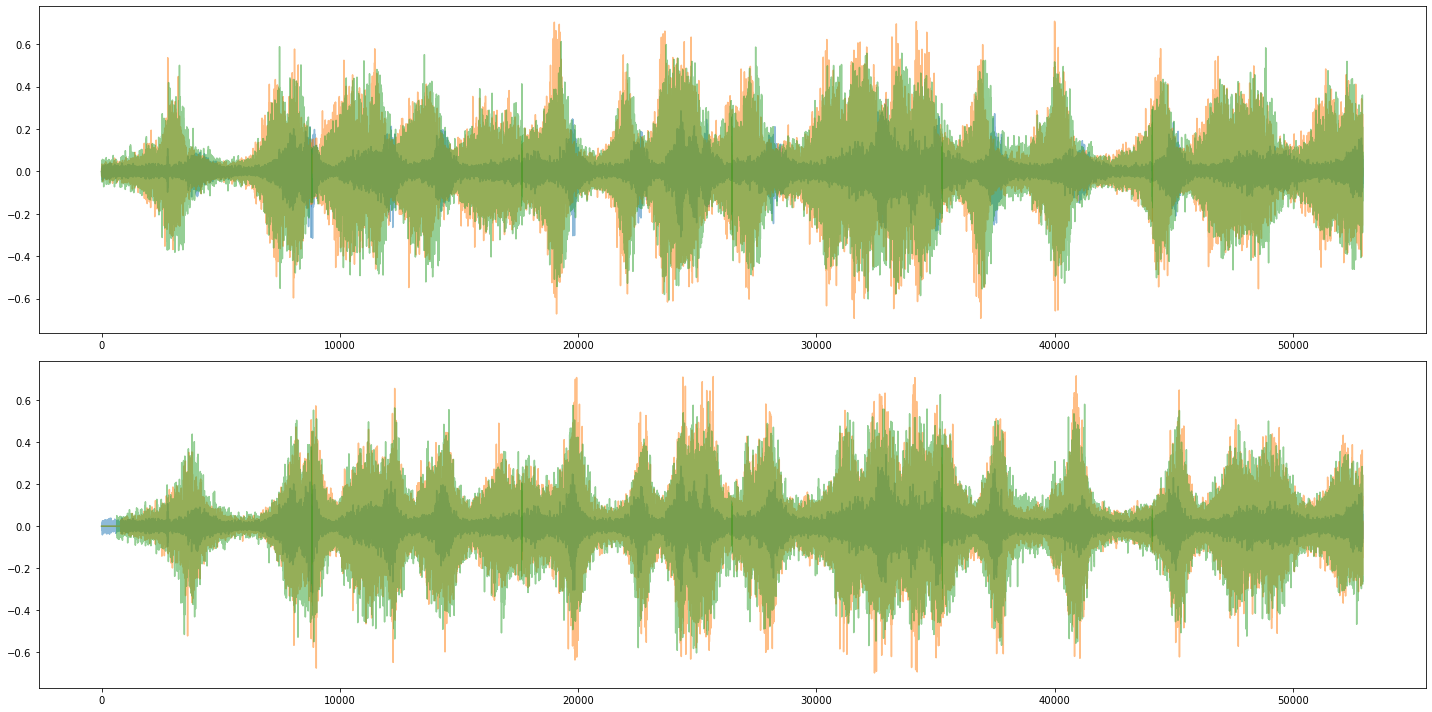

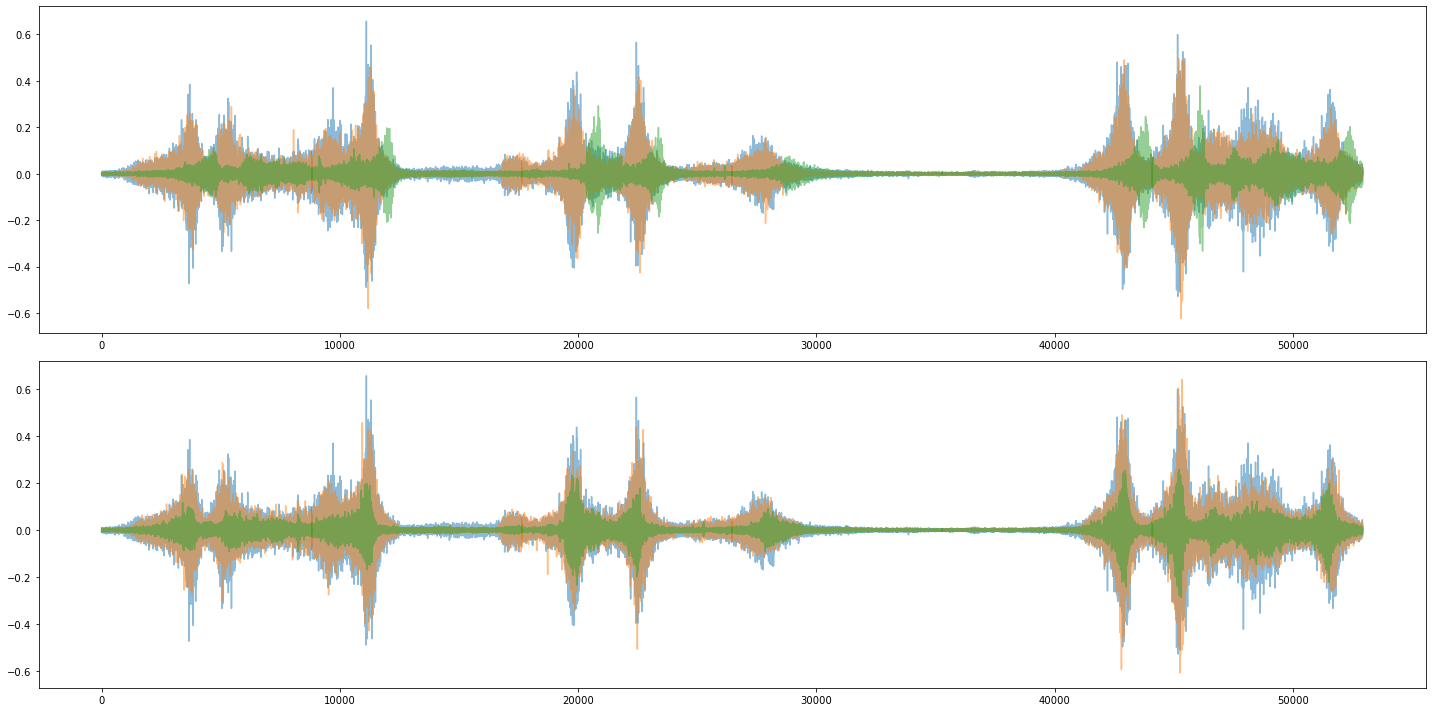

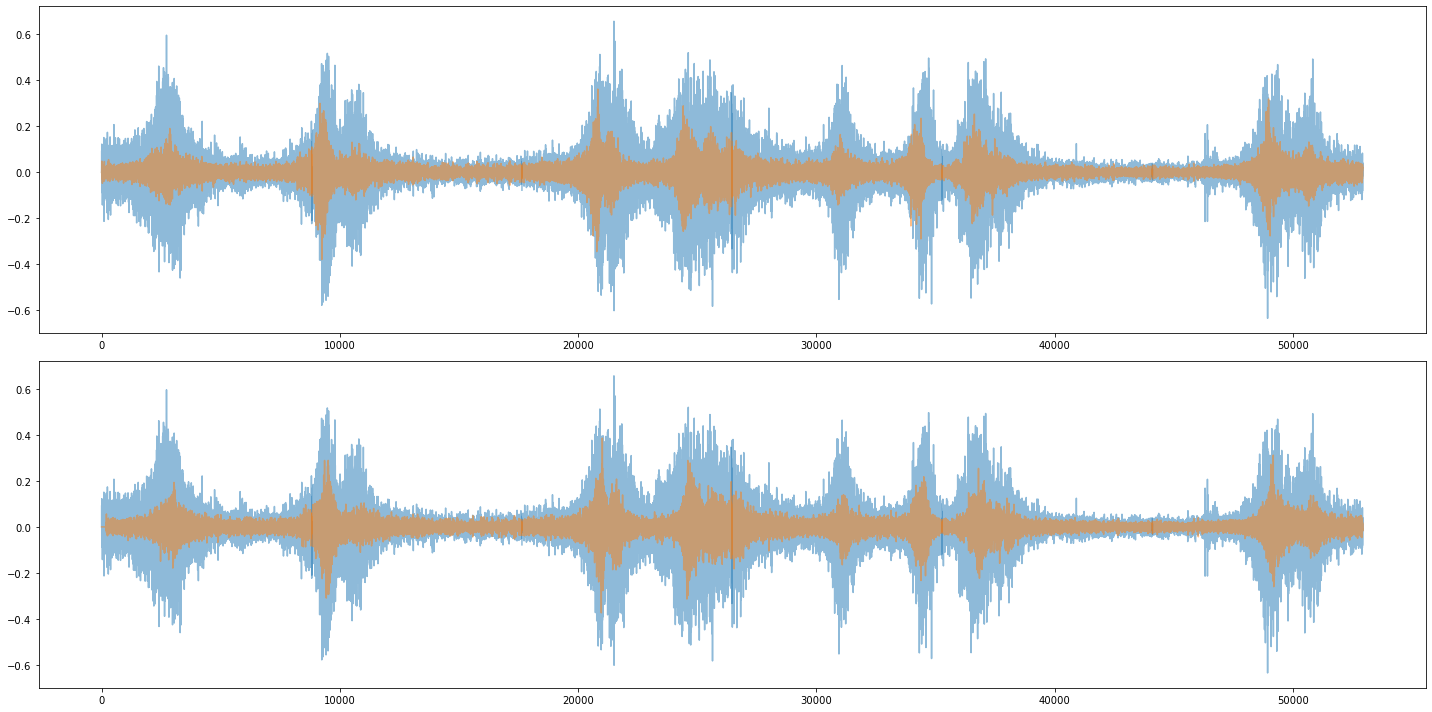

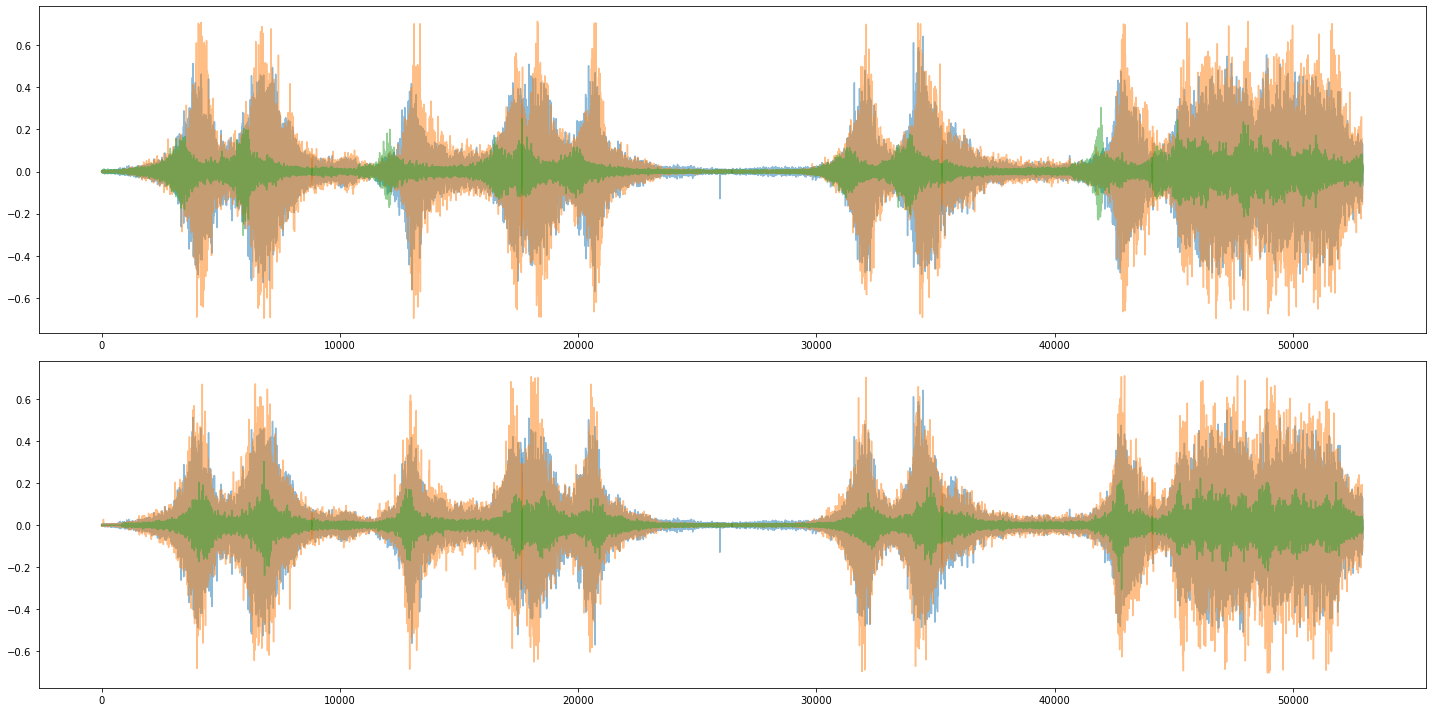

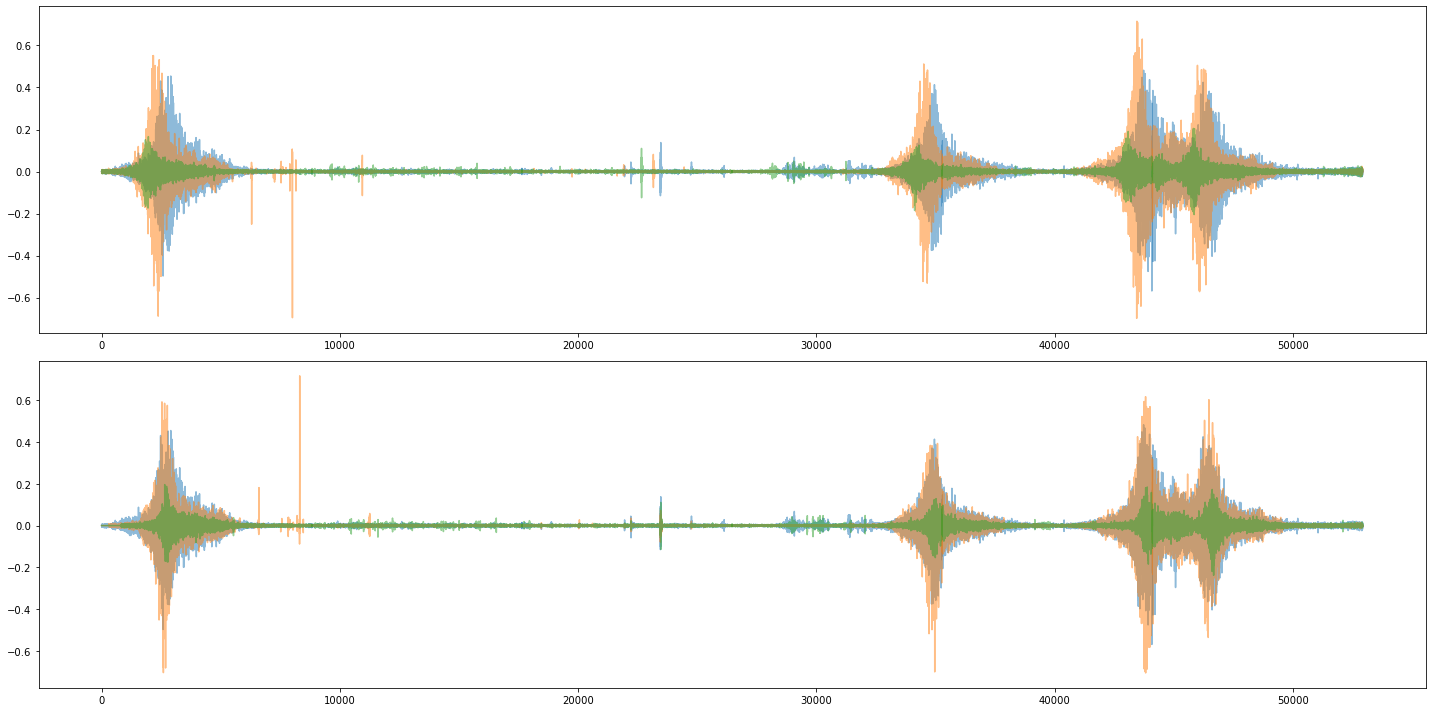

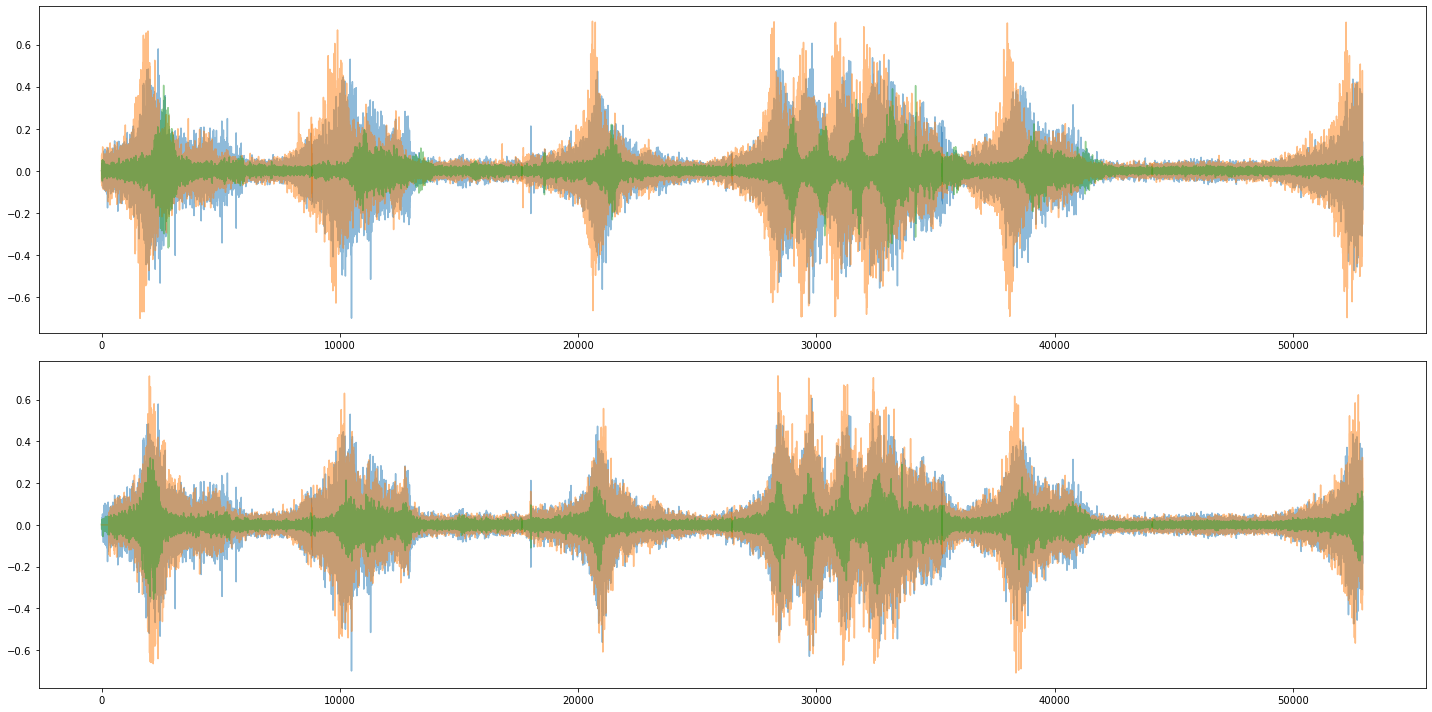

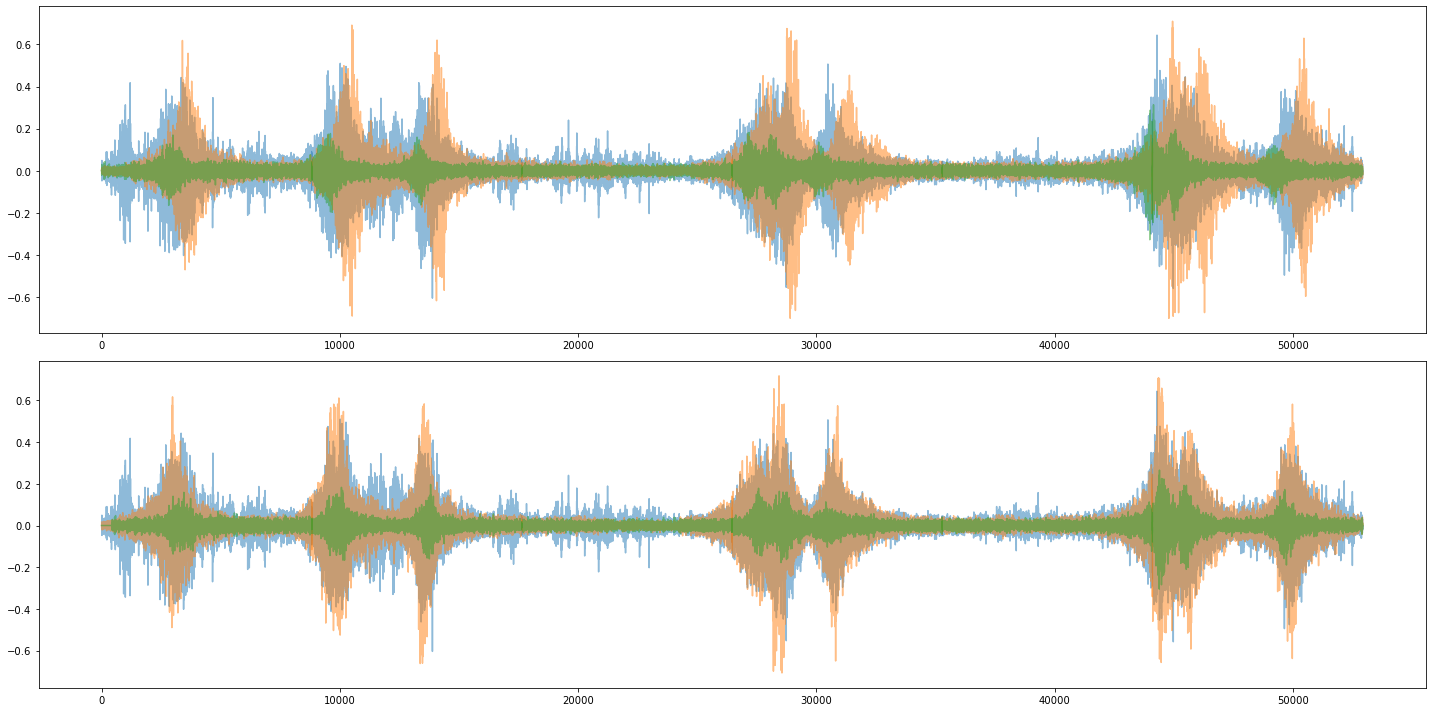

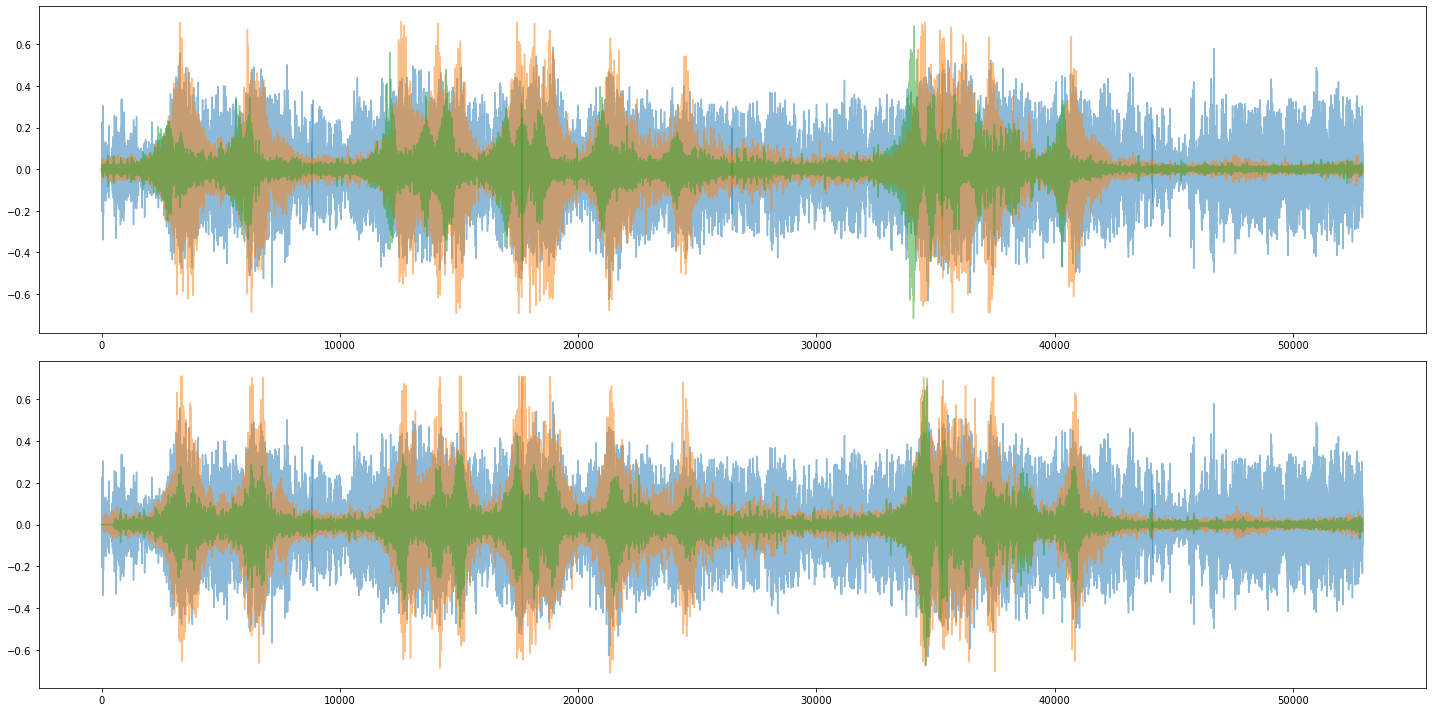

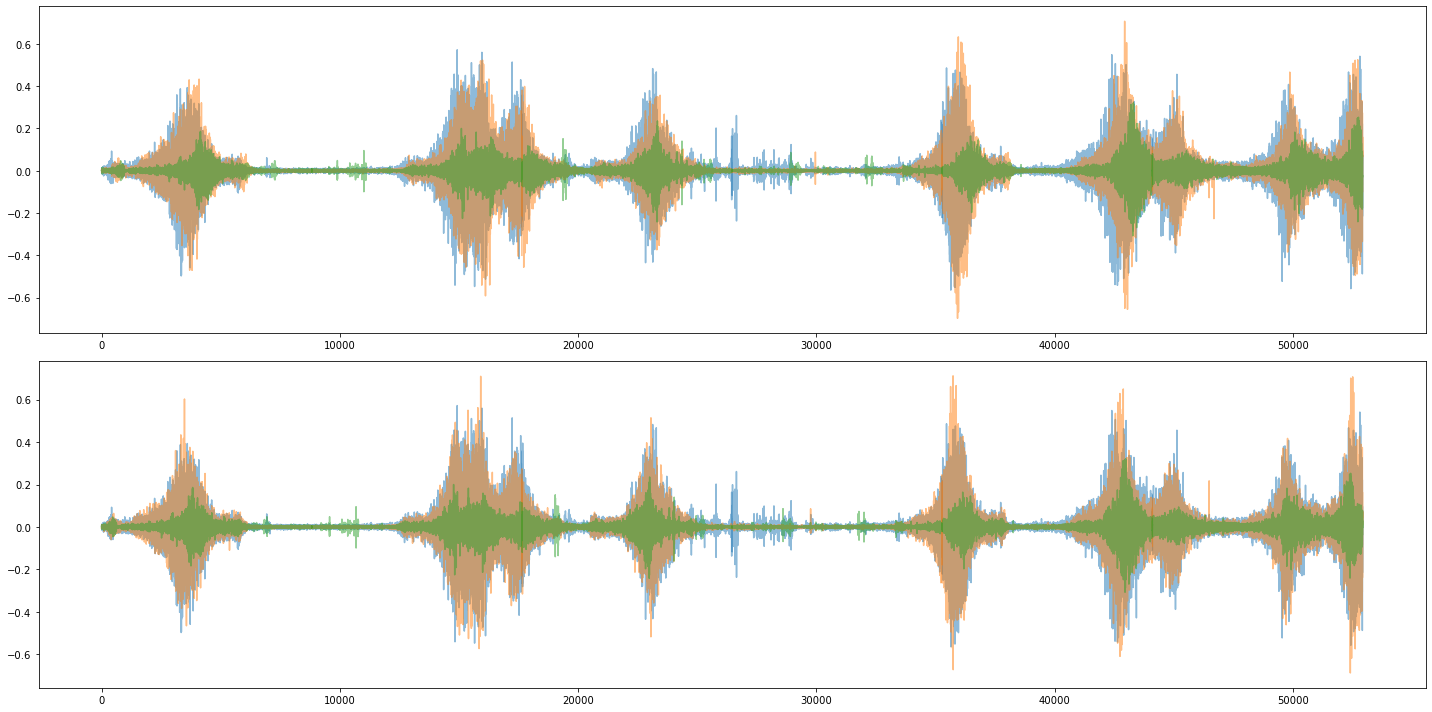

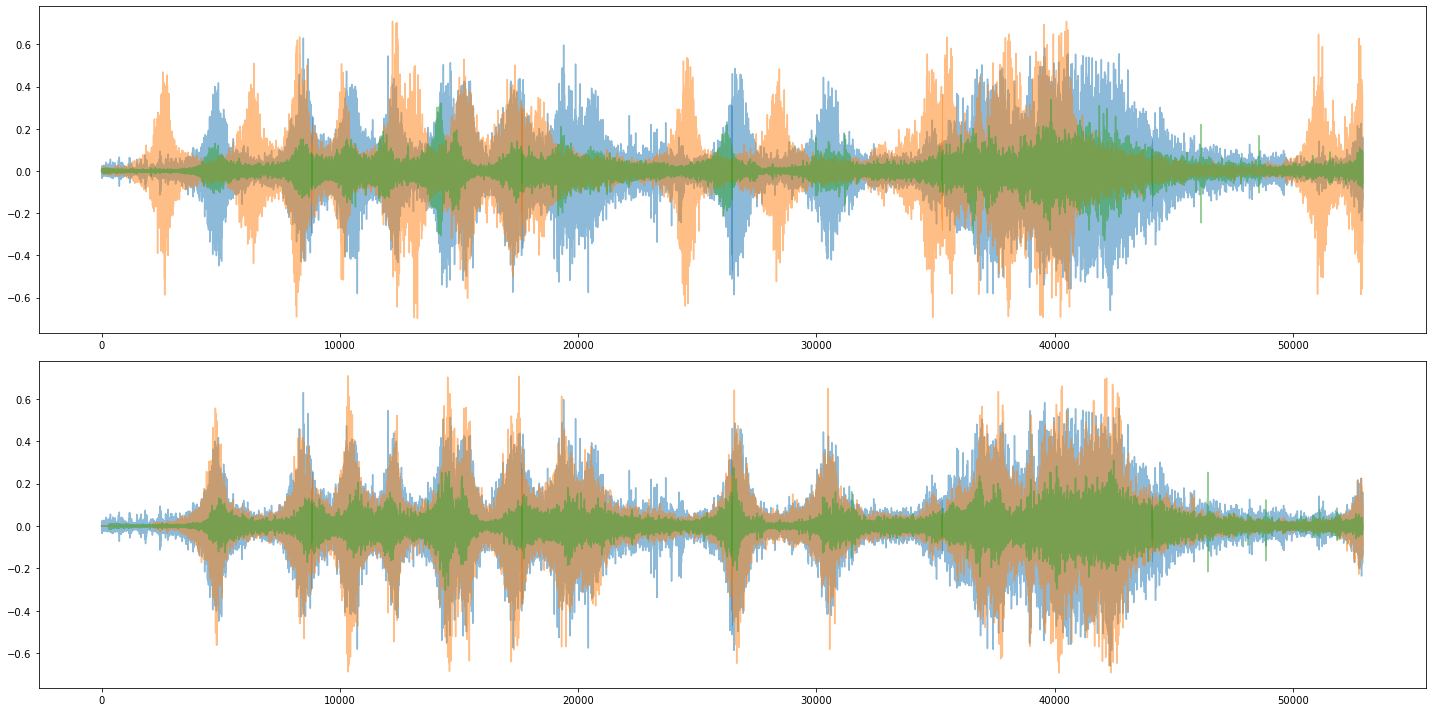

In [85]:
for reference_name, targets in alignmnemt_dict.items():
    # load reference signal
    reference_signal, sr = load_audio_wav(f'data/audio/{reference_name}.MP4.wav', True)
    
    # save reference signal as pt
    torch.save([reference_signal, sr], f'data/audio_tensors/{reference_name}.MP4.pt')

    signals = [reference_signal]
    signals_aligned = [reference_signal]
    for target_name in targets:
        # load target signal
        target_signal = load_audio_wav(f'data/audio/{target_name}.MP4.wav')
        signals.append(target_signal)

        # align reference and target signals
        aligned_signal = align_signals(reference_signal, target_signal)
        signals_aligned.append(aligned_signal)

        # save aligned target signal
        torch.save([aligned_signal, sr], f'data/audio_tensors/{target_name}_aligned.MP4.pt')
        
        # save csv
        if not os.path.exists(f'data/csv/{target_name}.MP4_aligned.csv'):
            shutil.copy2(f'data/csv/{reference_name}.MP4.csv', f'data/csv/{target_name}_aligned.MP4.csv')

    fig, axes = plt.subplots(2, figsize=(20, 10))
    plot_alignment(signals, ax=axes[0])
    plot_alignment(signals_aligned, ax=axes[1])
    plt.tight_layout()
    plt.savefig(f'plots/alignments/{reference_name}.png')


In [8]:
from preprocess_data import preprocess

files_to_preprocess = []
for v in alignmnemt_dict.values():
    files_to_preprocess.extend(v)
files_to_preprocess = [f'{name}_aligned' for name in files_to_preprocess]
preprocess(files_to_preprocess)

files_to_preprocess = list(alignmnemt_dict.keys())
preprocess(files_to_preprocess)

--------------------------------------------------
File:  01_Vypadova_A41

Extracting audio
file data/audio_tensors/01_Vypadova_A41.MP4.pt exists

Extracting labels
01_Vypadova_A41: 0.95, 0.55

Extracting intervals
data/labels/01_Vypadova_A41.MP4.txt 9
--------------------------------------------------
File:  03_KPrehradam_A6000

Extracting audio
file data/audio_tensors/03_KPrehradam_A6000.MP4.pt exists

Extracting labels
03_KPrehradam_A6000: 2.15, 0.45

Extracting intervals
data/labels/03_KPrehradam_A6000.MP4.txt 23
--------------------------------------------------
File:  05_RX100

Extracting audio
file data/audio_tensors/05_RX100.MP4.pt exists

Extracting labels
05_RX100: 1.35, 1.15

Extracting intervals
data/labels/05_RX100.MP4.txt 32
--------------------------------------------------
File:  06_RX100

Extracting audio
file data/audio_tensors/06_RX100.MP4.pt exists

Extracting labels
06_RX100: 1.55, 0.85

Extracting intervals
data/labels/06_RX100.MP4.txt 34
-------------------------

# Part II

In [ ]:
config = Config()
config.normalization = 'global'
transformation = create_transformation(config)

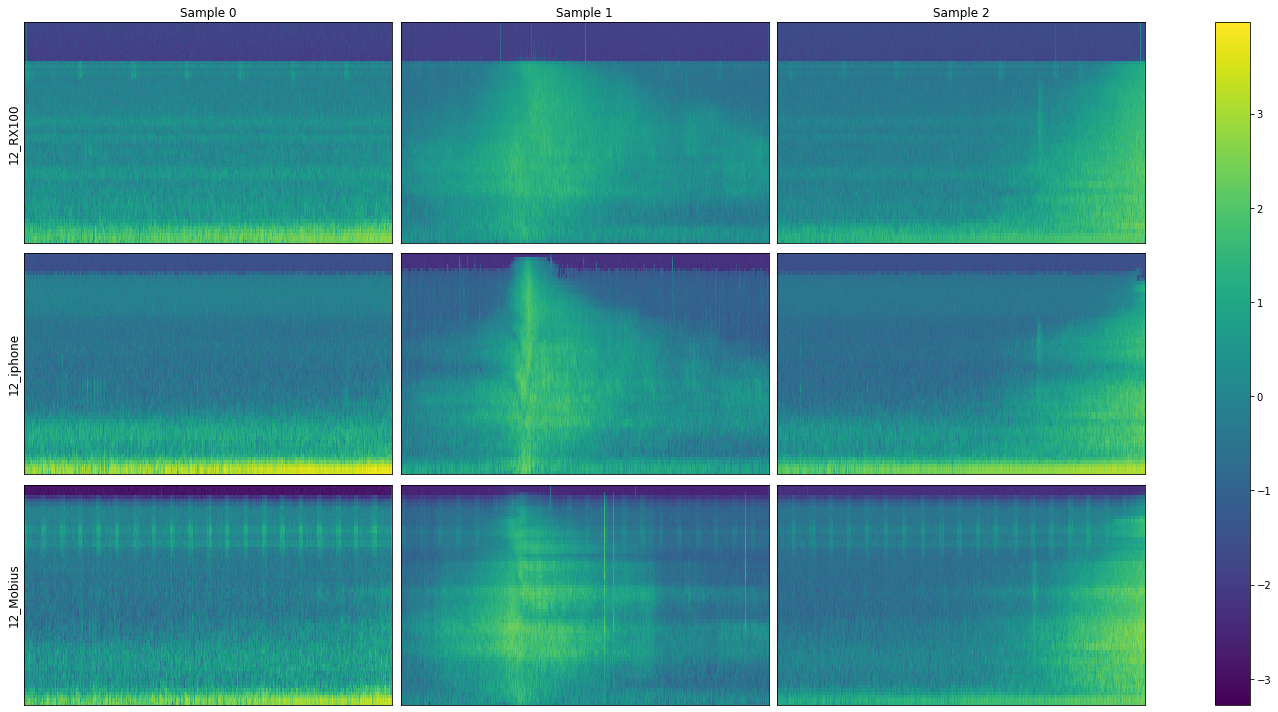

In [ ]:
n_domains = 3
n_samples = 3

s1, sr1 = torch.load('data/audio_tensors/12_RX100.MP4.pt')
s2, sr2 = torch.load('data/audio_tensors/12_iphone.MP4.pt')
s3, sr3 = torch.load('data/audio_tensors/12_Mobius.MP4.pt')

vmin = np.inf
vmax = -np.inf

features = defaultdict(list)

for i in range(n_samples):
    f_i = int(np.random.choice(len(s1)))
    f_j = int(f_i + 20 * sr1)
    
    for s in [s1, s2, s3]:
        X = s[f_i: f_j]
        X = transformation(X).squeeze()
        vmin = min(X.min(), vmin)
        vmax = max(X.max(), vmax)
        features[i].append(X)

fig, axes = plt.subplots(n_samples, n_domains, figsize=(20, 10))

for i in range(n_samples):
    for j in range(n_domains):
        ax = axes[i, j]
        im = ax.pcolormesh(features[j][i], vmin=vmin, vmax=vmax)
        
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)

cols = [f'Sample {i}' for i in range(n_samples)]
rows = ['12_RX100', '12_iphone', '12_Mobius']
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
for ax, row in zip(axes[:, 0], rows):
    ax.set_ylabel(row, size='large')
    
plt.tight_layout()
fig.colorbar(im, ax=axes.tolist());